<a href="https://colab.research.google.com/github/ZPavlo/ML_projects/blob/master/MNIST_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')
ROOT_DATA = 'gdrive/My Drive/datasets/'


Mounted at /content/gdrive


# Data Prepering

In [3]:
import os 
import numpy as np
import pandas as pd
np.random.seed(71)

import tensorflow as tf
from sklearn.model_selection import train_test_split

mnist_train = pd.read_csv(os.path.join(ROOT_DATA, "mnist", 'train.csv'))
mnist_test = pd.read_csv(os.path.join(ROOT_DATA, "mnist", 'test.csv'))

y_data = mnist_train['label']
x_data = mnist_train.drop("label", axis=1)

x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

x_test = mnist_test

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

print(y_train.shape)
print(y_valid.shape)

(33600, 784)
(8400, 784)
(28000, 784)
(33600,)
(8400,)


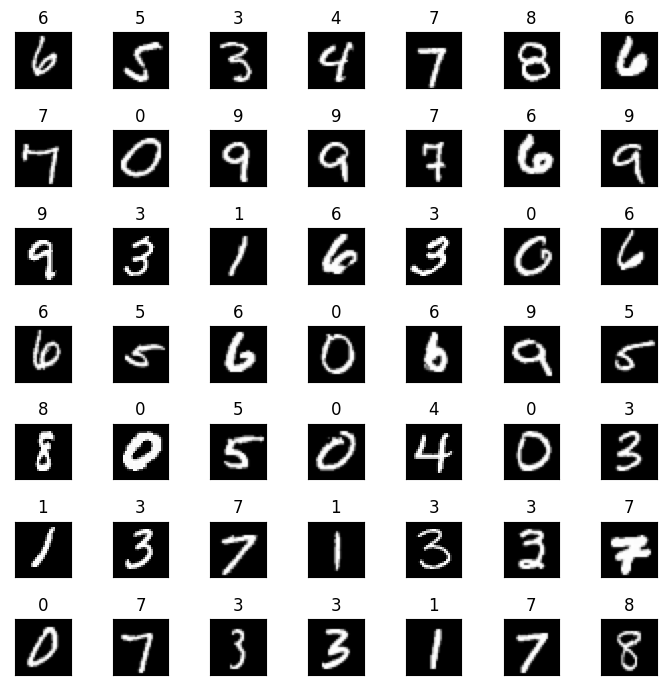

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(imgs_in, labels_in):
  cnt = 0
  plt.figure(figsize=(7, 7), dpi=100)
  for i in range(7):
      for j in range(7):
          plt.subplot(7, 7, cnt+1)
          plt.xticks([], [])
          plt.yticks([], [])
          img_in = imgs_in[cnt]
          plt.title("{}".format(labels_in[cnt]))
          plt.imshow(img_in, cmap="gray")
          cnt += 1
  plt.tight_layout()
  plt.show()

np_x_train = np.resize(x_train.to_numpy(), (33600, 28, 28, 1))
imshow(np_x_train[:49, :, :, 0], np.array(y_train[:49]))

# Principal component analysis

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

standardized_x_train = StandardScaler().fit_transform(x_train)

print(standardized_x_train.shape)

(33600, 784)


In [9]:
pca = PCA()
pca.fit_transform(standardized_x_train)

array([[-2.71863253e+00, -4.89824095e-01,  1.13549660e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-6.76980150e-01, -6.75362491e+00, -2.33590139e+00, ...,
         1.38152468e-15, -7.52245057e-16,  1.15153545e-16],
       [-3.03323281e+00,  6.50981624e+00,  7.49182983e+00, ...,
         1.34354246e-15, -1.81229562e-16,  7.25180131e-17],
       ...,
       [ 2.14883643e+00,  7.80794439e-01, -7.47387739e-01, ...,
        -2.76530089e-19,  1.45834314e-18, -5.60058345e-18],
       [ 1.05957006e+00,  9.47673116e-01,  3.94973114e+00, ...,
        -3.21804622e-18, -4.13801709e-17, -4.27433756e-18],
       [ 1.77025845e+01,  1.96188185e+00, -4.94352837e+00, ...,
         2.36592528e-18, -1.11527083e-18,  6.10903981e-18]])

Text(0, 0.5, 'Explained variance')

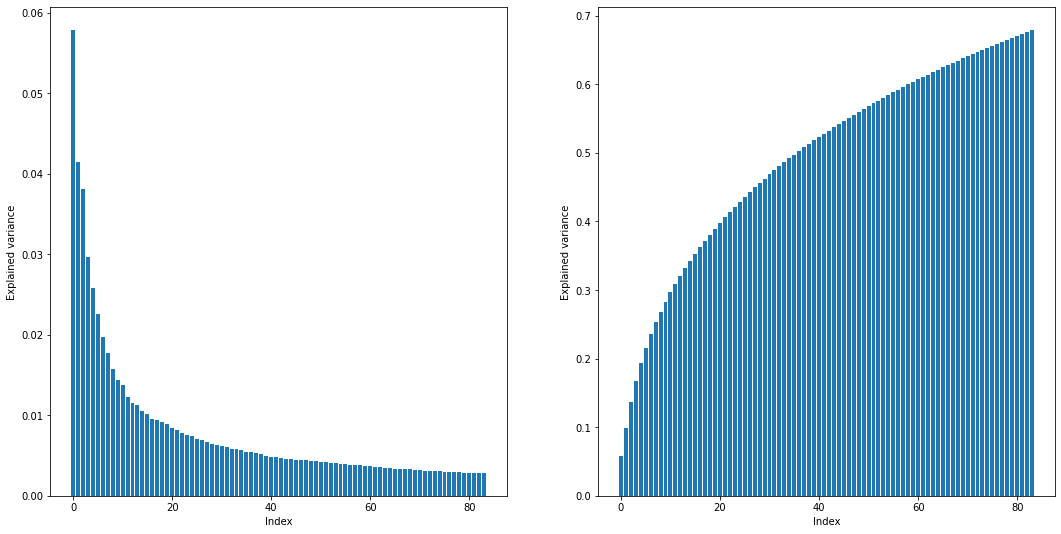

In [10]:
N = 84

x = np.arange(N)
y = pca.explained_variance_ratio_[:N]
plt.figure(figsize=(18, 9))

plt.subplot(121)
plt.bar(x, y)
plt.xlabel('Index')
plt.ylabel('Explained variance')

plt.subplot(122)
plt.bar(x, [sum(y[:i]) + y_i for i, y_i in enumerate(y)])
plt.xlabel('Index')
plt.ylabel('Explained variance')


## PCA 2D

explained variance ratio = 0.09934461907360934


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


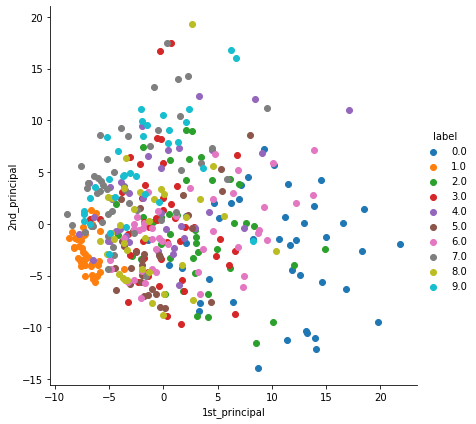

In [11]:
import pandas as pd
import seaborn as sn

pca_2 = PCA(2)
pca_data = pca_2.fit_transform(standardized_x_train)

print("explained variance ratio = {}".format(np.sum(pca_2.explained_variance_ratio_)))

pca_data = np.vstack((pca_data.T, y_train)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data[:400], columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## PCA 3D

explained variance ratio = 0.1373870092471135


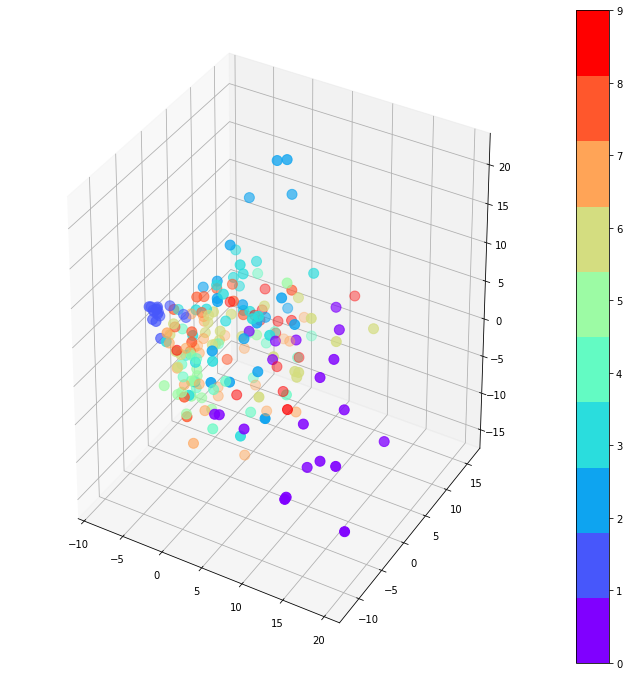

In [12]:
pca_3 = PCA(3)
pca_data = pca_3.fit_transform(standardized_x_train)

print("explained variance ratio = {}".format(np.sum(pca_3.explained_variance_ratio_)))

n = 200
data_slice = pca_data[:n]
labels_slice = y_train[:n]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xs=data_slice[:, 0], ys=data_slice[:, 1], zs=data_slice[:, 2], s=100, c=labels_slice, cmap=plt.cm.get_cmap('rainbow', 10))
plt.colorbar(p)


## Train SVC

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

standardized_x_train = StandardScaler().fit_transform(x_train)

pca_train = PCA(20)
pca_data = pca_train.fit_transform(standardized_x_train)

print("explained variance ratio = {}".format(np.sum(pca_train.explained_variance_ratio_)))

explained variance ratio = 0.38939755773256135


In [53]:
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

y_train_bin = label_binarize(y_train, classes=np.arange(y_train.max()))

indexes = np.arange(len(x_train), dtype=np.int)
np.random.shuffle(indexes)
x_local = pca_data[indexes[:4000]]
y_local_bin = y_train_bin[indexes[:4000]]

clf = OneVsRestClassifier(SVC()).fit(x_local, y_local_bin)

## Test SVC


In [54]:
standardized_x_valid = StandardScaler().fit_transform(x_valid)

pca_valid = pca_train.transform(standardized_x_valid)
predict_y = clf.predict(pca_valid)

In [55]:
from sklearn.metrics import accuracy_score

y_valid_bin = label_binarize(y_valid, classes=np.arange(y_valid.max()))

print("Accuracy:", accuracy_score(y_valid_bin, predict_y))

Accuracy: 0.8775


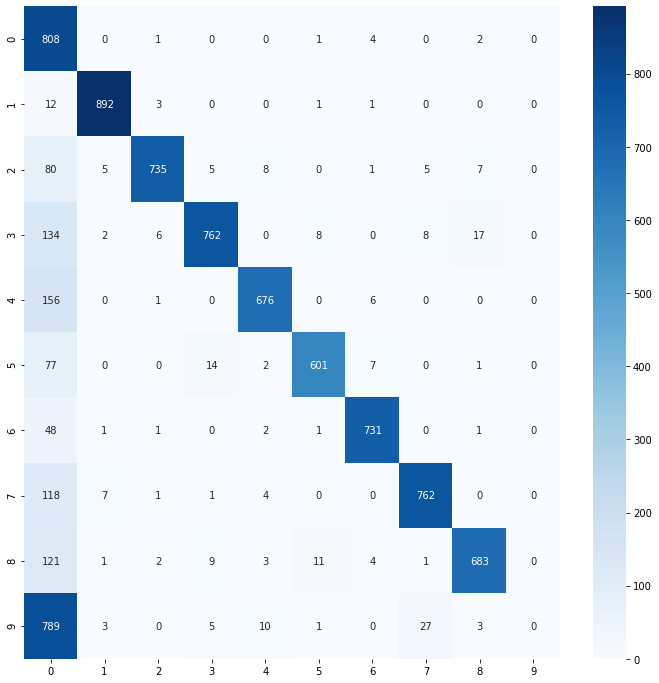

In [56]:
from sklearn.metrics import confusion_matrix

array = confusion_matrix(y_valid, np.argmax(predict_y, axis=1))

df_cm = pd.DataFrame(array, index = [i for i in "0123456789"],
                    columns = [i for i in "0123456789"])

plt.figure(figsize = (12,12))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

## Test Random Forest

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

standardized_x_train = StandardScaler().fit_transform(x_train)

pca_train = PCA(20)
pca_data = pca_train.fit_transform(standardized_x_train)

print("explained variance ratio = {}".format(np.sum(pca_train.explained_variance_ratio_)))

explained variance ratio = 0.3893968624727948


In [69]:
from sklearn.ensemble import RandomForestClassifier


# y_train_bin = label_binarize(y_train, classes=np.arange(y_train.max()))

indexes = np.arange(len(x_train), dtype=np.int)
np.random.shuffle(indexes)
x_local = pca_data[indexes[:4000]]
y_local = np.array(y_train)[indexes[:4000]]

forest = RandomForestClassifier(n_estimators = 500)
forest = forest.fit(x_local, y_local)
# forest_output = forest.predict(X_test)
# print("Random Forest with n_estimators:500")
# print(accuracy_score(y_test, forest_output))

## Test

In [70]:
standardized_x_valid = StandardScaler().fit_transform(x_valid)

pca_valid = pca_train.transform(standardized_x_valid)
predict_y = forest.predict(pca_valid)

In [71]:
from sklearn.metrics import accuracy_score

y_valid_bin = label_binarize(y_valid, classes=np.arange(y_valid.max()))
predict_y_bin = label_binarize(predict_y, classes=np.arange(predict_y.max()))

print("Accuracy:", accuracy_score(y_valid_bin, predict_y_bin))

Accuracy: 0.9027380952380952


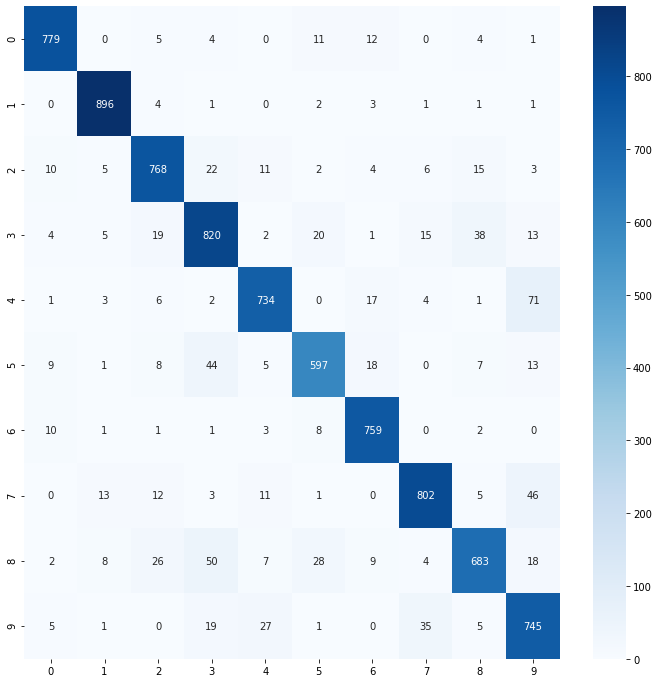

In [73]:
from sklearn.metrics import confusion_matrix

array = confusion_matrix(y_valid, predict_y)

df_cm = pd.DataFrame(array, index = [i for i in "0123456789"],
                    columns = [i for i in "0123456789"])

plt.figure(figsize = (12,12))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

# t-SNE

https://distill.pub/2016/misread-tsne/




[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.068s...
[t-SNE] Computed neighbors for 1000 samples in 1.844s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 6.994552
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.509071
[t-SNE] KL divergence after 1000 iterations: 1.127083


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


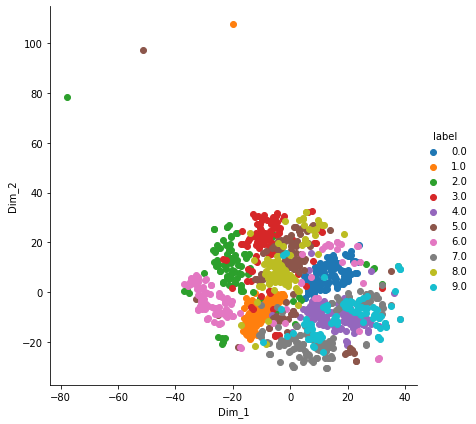

In [36]:
from sklearn.manifold import TSNE

data_1000 = standardized_x_train[:1000,:]
labels_1000 = y_train[:1000]

model_2d = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
tsne_data_2d = model_2d.fit_transform(data_1000)[:, :2]

tsne_data_2d = np.vstack((tsne_data_2d.T, labels_1000)).T
tsne_2d_df = pd.DataFrame(data=tsne_data_2d, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_2d_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [12]:
from sklearn.manifold import TSNE

data_1000 = standardized_x_train[:10000,:]
labels_1000 = y_train[:10000]

model_3d = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=1000)
tsne_data_3d = model_3d.fit_transform(data_1000)[:, :3]

tsne_data_3d = np.vstack((tsne_data_3d.T, labels_1000)).T
tsne_3d_df = pd.DataFrame(data=tsne_data_3d, columns=("Dim_1", "Dim_2", "Dim_3", "label"))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.069s...
[t-SNE] Computed neighbors for 1000 samples in 1.920s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 7.165460
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.220528
[t-SNE] KL divergence after 1000 iterations: 1.262689


<Figure size 2880x2880 with 0 Axes>

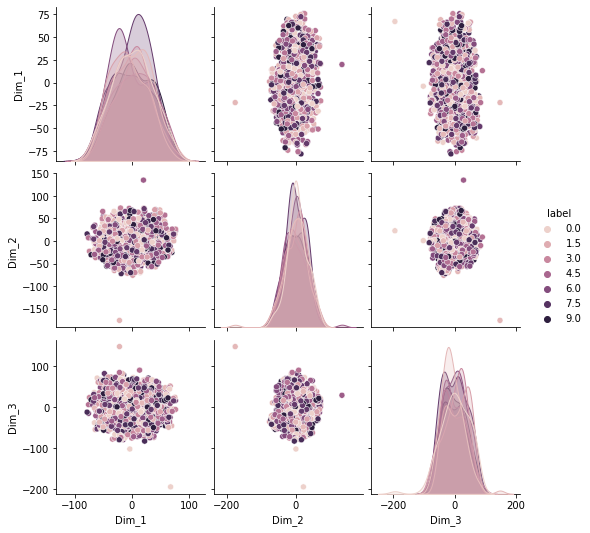

In [17]:
plt.figure(figsize=(40, 40))
sn.pairplot(tsne_3d_df, hue="label")